In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# set seed for reproducibilty
np.random.seed(1) 
num_samples = 100
X = np.random.uniform(-1.,1.,num_samples)
m = 2.5
b = 1
y = m*X +b # y = 2.5X + 1 

In [3]:
X

array([-0.16595599,  0.44064899, -0.99977125, -0.39533485, -0.70648822,
       -0.81532281, -0.62747958, -0.30887855, -0.20646505,  0.07763347,
       -0.16161097,  0.370439  , -0.5910955 ,  0.75623487, -0.94522481,
        0.34093502, -0.1653904 ,  0.11737966, -0.71922612, -0.60379702,
        0.60148914,  0.93652315, -0.37315164,  0.38464523,  0.7527783 ,
        0.78921333, -0.82991158, -0.92189043, -0.66033916,  0.75628501,
       -0.80330633, -0.15778475,  0.91577906,  0.06633057,  0.38375423,
       -0.36896874,  0.37300186,  0.66925134, -0.96342345,  0.50028863,
        0.97772218,  0.49633131, -0.43911202,  0.57855866, -0.79354799,
       -0.10421295,  0.81719101, -0.4127717 , -0.42444932, -0.73994286,
       -0.96126608,  0.35767107, -0.57674377, -0.46890668, -0.01685368,
       -0.89327491,  0.14823521, -0.70654285,  0.17861107,  0.39951672,
       -0.79533114, -0.17188802,  0.38880032, -0.17164146, -0.90009308,
        0.07179281,  0.32758929,  0.02977822,  0.88918951,  0.17

In [4]:
y

array([ 0.58511002,  2.10162247, -1.49942813,  0.01166286, -0.76622055,
       -1.03830703, -0.56869894,  0.22780364,  0.48383737,  1.19408367,
        0.59597257,  1.9260975 , -0.47773875,  2.89058718, -1.36306203,
        1.85233755,  0.58652401,  1.29344914, -0.79806531, -0.50949255,
        2.50372284,  3.34130788,  0.06712089,  1.96161308,  2.88194576,
        2.97303332, -1.07477894, -1.30472608, -0.6508479 ,  2.89071252,
       -1.00826583,  0.60553813,  3.28944765,  1.16582642,  1.95938557,
        0.07757816,  1.93250464,  2.67312836, -1.40855861,  2.25072157,
        3.44430544,  2.24082827, -0.09778004,  2.44639664, -0.98386997,
        0.73946763,  3.04297752, -0.03192926, -0.06112331, -0.84985714,
       -1.40316521,  1.89417766, -0.44185942, -0.1722667 ,  0.9578658 ,
       -1.23318727,  1.37058803, -0.76635713,  1.44652768,  1.9987918 ,
       -0.98832786,  0.57027994,  1.97200079,  0.57089635, -1.25023271,
        1.17948203,  1.81897323,  1.07444556,  3.22297378,  1.43

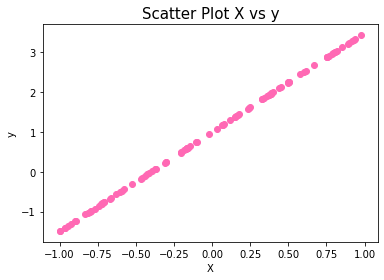

In [13]:
# plt.figure(figsize=(5,5))
plt.scatter(X,y,color = 'hotpink')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter Plot X vs y",fontsize=15)
plt.show()

Let us see how to use gradient descent for arriving at the desired weights (initialised randomly) This blog has a great explanantion.
https://towardsdatascience.com/gradient-descent-from-scratch-e8b75fa986cc
                                                                           )

### Gradient Descent
In gradient descent, the gradient of the objective function (L) with respect to the parameters theta (θ
) is calculated and the the parameters are updated in the opposite direction of the gradient of the objective function. The learning rate α determines the size of the steps to be taken 
to reach the local minimum. 
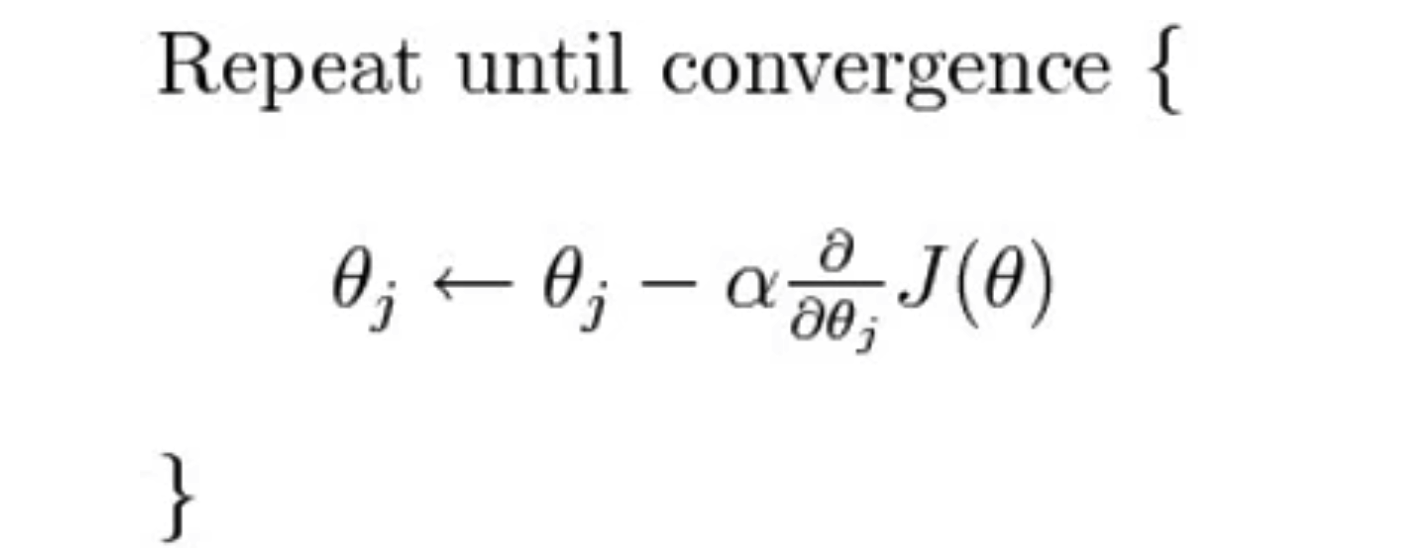


### In our example, our objective function is mean squared error. 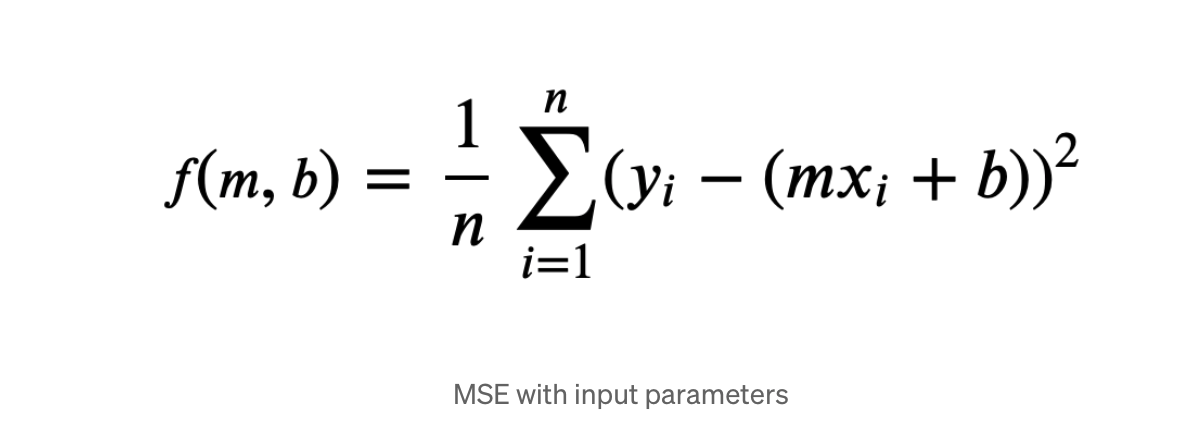


### Gradient with respect to m 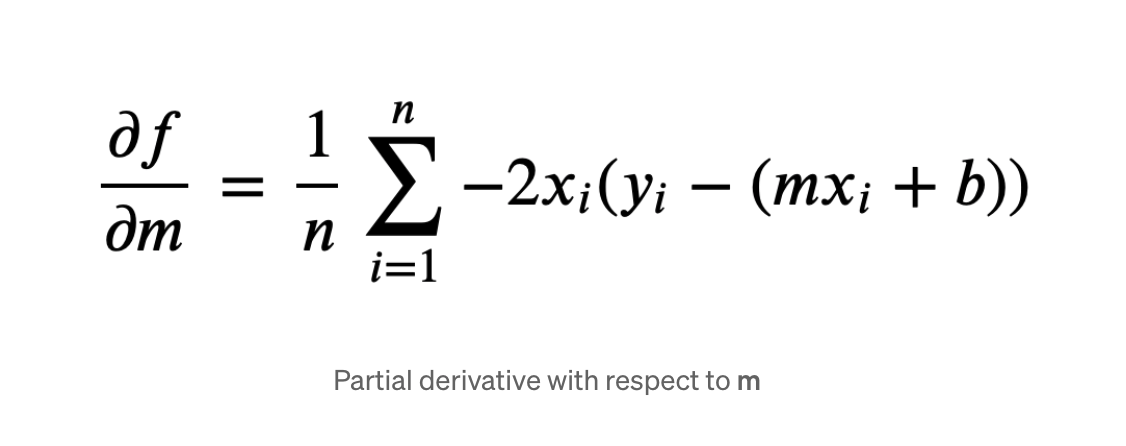


### Gradient with respect to b 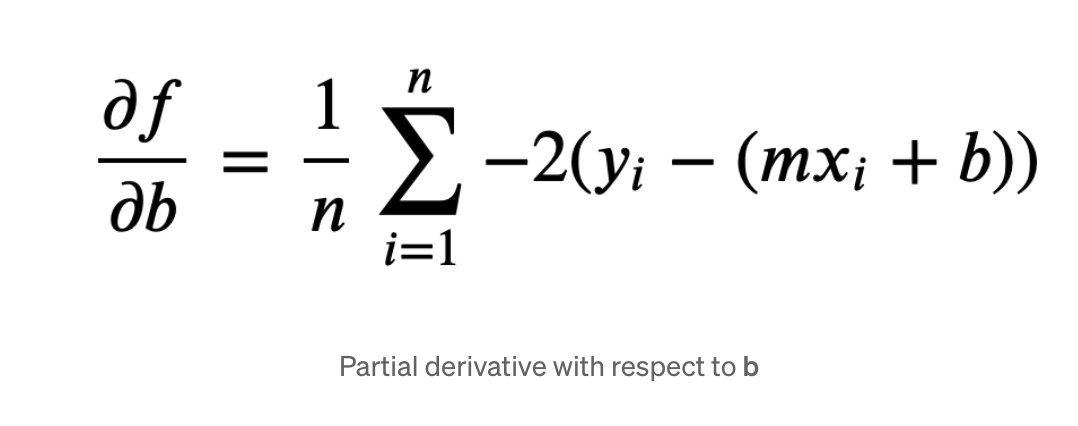

### Batch Gradient Descent 

Computes the gradient of the objective function w.r.t parameters for the entire dataset. We update the parameters only once per epoch.


With 10 epochs, all the data is used for the calculation of gradients and weight is updated. 
So there will be 10 updates, one for each epoch. 

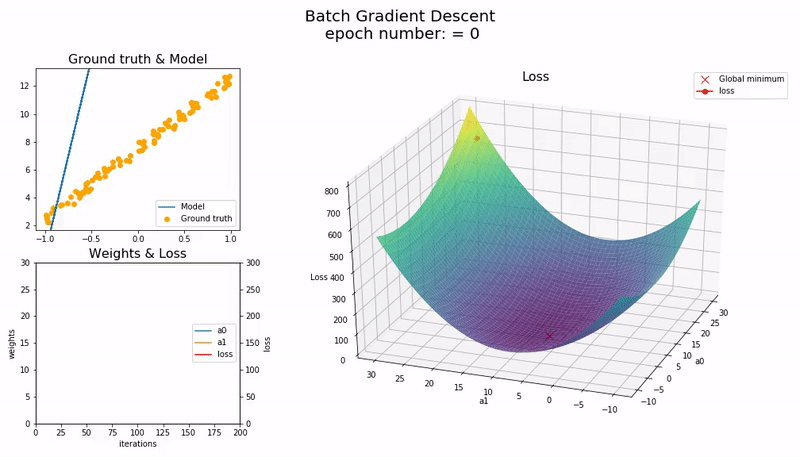

In [102]:
import numpy as np
from sklearn.metrics import mean_squared_error

def batch_gradient_descent(X, y, lr, epochs): 
    m, b = 0.5, 0.5 # initialising the parameters
    # log stores m and b values for differnt updates 
    # mse stores the error
    log, mse = [], [] # lists to store learning process 
    N = len(X) # number of samples
    
    for _ in range(epochs):               
        f = y - (m*X + b)   
        # Updating m and b
        m -= lr * (-2 * X.dot(f).sum() / N)
        b -= lr * (-2 * f.sum() / N)
    
        log.append((m, b))
        mse.append(mean_squared_error(y, (m*X + b)))        
    return m, b, log, mse

In [103]:
lr = 0.1
epochs = 75
m, b, log, mse = batch_gradient_descent(X, y, lr, epochs)

print(m)
print(b)
# print(log)
# print(mse)
print(len(mse))

2.4907264049165287
0.9995993183155379
75


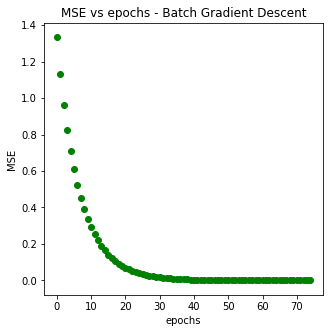

In [104]:
epochs = range(epochs) 
plt.figure(figsize=(5,5))
plt.scatter(epochs, mse, color = 'green')
plt.title("MSE vs epochs - Batch Gradient Descent")
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.show()

### Stochastic Gradient Descent 

Stochastic Gradient Descent uses only one sample from the entire dataset per epoch to update parameters, which makes it faster.

Updates happen once every epoch. Hence for n epochs, we only update n times as in Gradient Descent. 

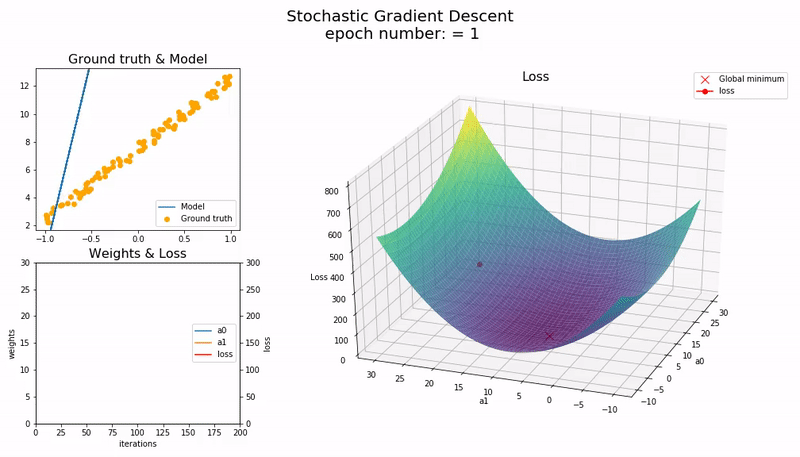

In [105]:
import numpy as np
from sklearn.metrics import mean_squared_error
def SGD(X, y, lr, epochs):
    m, b = 0.5, 0.5 # initial parameters
    log, mse = [], [] # lists to store learning process

    for _ in range(epochs):
        indexes = np.random.randint(0, len(X)) # random sample
        Xs = np.take(X, indexes)
        ys = np.take(y, indexes)
        N = len(X)
        f = ys - (m*Xs + b)

        # Updating parameters m and b
        m -= lr * (-2 * Xs*(f).sum() / N)
        b -= lr * (-2 * f.sum() / N)

        log.append((m, b))
        mse.append(mean_squared_error(y, m*X+b))        

    return m, b, log, mse

In [106]:
epochs = 500
lr = 0.85
m, b, log, mse = SGD(X, y, lr, epochs)
m, b, len(mse)

(2.3857519165108267, 0.9937246851818283, 500)

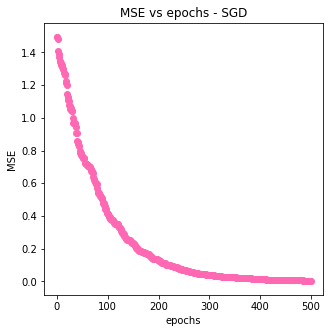

In [107]:
epochs = range(epochs) 
plt.figure(figsize=(5,5))
plt.title("MSE vs epochs - SGD")
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.scatter(epochs, mse, color = 'hotpink')
plt.show()

### Minibatch gradient Descent 
Mini-batch gradient descent finally takes the best of both worlds and performs an update for every mini-batch of "bs" training examples.

In this example we have 100 samples, with a batchsize of 10. Updates happen for every batch. So in 10 epochs, we have 100 updates.


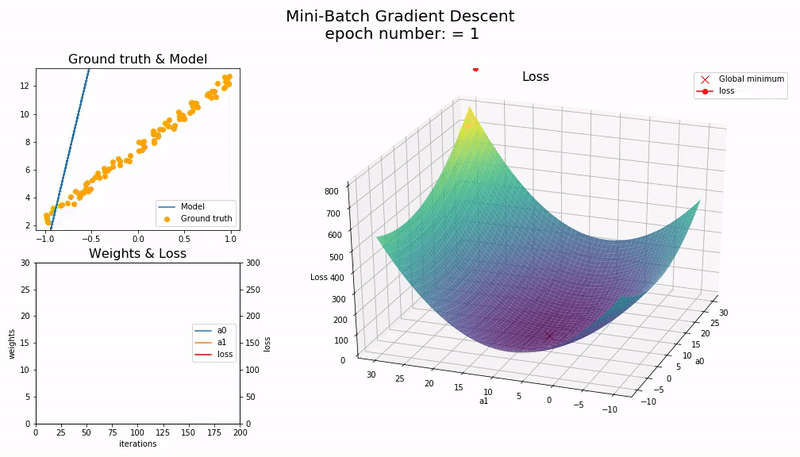


In [1]:
def minibatchgd(X, y, lr, epochs, batch_size):
    m, b = 0.5, 0.5 # initial parameters
    log, mse = [], [] # lists to store learning process
    for _ in range(epochs):
        total_len = len(X)
        for i in range(0, total_len, batch_size):
            Xs = X[i:i+batch_size]
            ys = y[i:i+batch_size]
            N = len(Xs)
            f = ys - (m*Xs + b)
            # Updating parameters m and b
            m -= lr * (-2 * Xs.dot(f).sum() / N)
            b -= lr * (-2 * f.sum() / N)
            log.append((m, b))
            mse.append(mean_squared_error(y, m*X+b))        

    return m, b, log, mse

In [109]:
epochs = 10
lr = 0.5
batch_size = 10
m,b,log,mse = minibatchgd(X, y,lr, epochs, batch_size)
print(m)
print(b)
# print(len(mse))
# print(mse)

2.499999999522777
0.9999999999405852


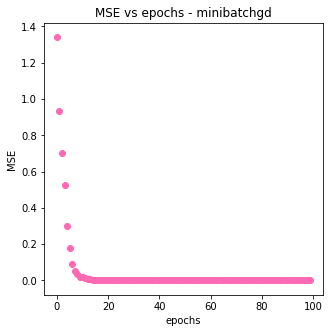

In [110]:
total_updates = int(epochs*(len(X)/batch_size))
epochs = range(total_updates)
plt.figure(figsize=(5,5))
plt.title("MSE vs epochs - minibatchgd")
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.scatter(epochs, mse, color = 'hotpink')
plt.show()

### Mini-Batch Stochastic Gradient 


In [111]:
def minbatchSGD(X, y, lr, epochs, batch_size):

    m, b = 0.5, 0.5 # initial parameters
    log, mse = [], [] # lists to store learning process

    for _ in range(epochs):
        indexes = np.random.randint(0, len(X), batch_size) # random sample
        Xs = np.take(X, indexes)
        ys = np.take(y, indexes)
        N = len(X)
    

        f = ys - (m*Xs + b)

        # Updating parameters m and b
        m -= lr * (-2 * Xs.dot(f).sum() / N)
        b -= lr * (-2 * f.sum() / N)

        log.append((m, b))
        mse.append(mean_squared_error(y, m*X+b))        

    return m, b, log, mse

In [112]:
epochs = 350
lr = 0.05
batch_size = 30
m,b,log,mse = minbatchSGD(X, y, lr, epochs, batch_size)
print(m,b)
# print(mse[:-50])

2.448758487575603 0.9975260327469013


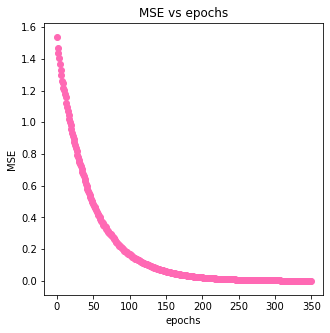

In [113]:
epochs = range(epochs)
plt.figure(figsize=(5,5))
plt.title("MSE vs epochs")
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.scatter(epochs, mse, color = 'hotpink')
plt.show()